# (3주차) 9월15일
>선형모형

- toc:true
- branch: master
- badges: true
- comments: true
- author: 윤도현

# Import 

In [2]:
import torch 
import numpy as np 
import matplotlib.pyplot as plt

### Data

`-` model: $y_i = w_0+ w_1 + x_i + \epsilon_i = 2.5 + 4x_i + \epsilon_i, \quad i=1,2, \dots, n$ 

`-` model: ${\bf y}= {\bf X}{\bf W} + \boldsymbol{\epsilon}$

`-` ${\bf y}=\begin{bmatrix} y_1 \\ y_2 \\ \dots \\ y_n\end{bmatrix}, \quad {\bf X}=\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ \dots \\1& x_n\end{bmatrix}, \quad {\bf W}=\begin{bmatrix}  2.5 \\ 4 \end{bmatrix}, \boldsymbol{\epsilon} =\begin{bmatrix} \epsilon_1 \\ \dots \\ \epsilon_n \end{bmatrix}$

In [36]:
torch.manual_seed(1)
n= 100 
ones= torch.ones(n)
x,_= torch.randn(n).sort()
X = torch.vstack([ones,x]).T
W = torch.tensor([2.5,4])
ϵ = torch.randn(n)*0.5
y= X@W +ϵ
ytrue= X@W

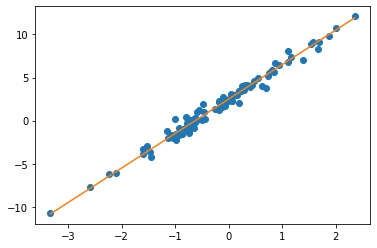

In [38]:
plt.plot(x,y,'o')
plt.plot(x,ytrue,'-')

# 학습이란?

`-` 파란점만 주어졌을 때, 주황색 점선을 추론하는것.

`-` 주어진 데이터로 $\begin{bmatrix} \hat{w}_0 \\ \hat{w}_1 \end{bmatrix}$를 최대한

$\begin{bmatrix} 2.5 \\ 4 \end{bmatirx}$와 비슷하게 만드는 것

- 주어진 데이터 : $\big\{(x_i,y_i) \big\}_{i=1}^{n}$

- 파라미터 : ${\bf W}= \begin{bmatrix} w_0 \\ w_1 \end{bmatrix}  $

- 파라미터 추정값 : ${\bf \hat{W}}= \begin{bmatrix} \hat{w_0} \\ \hat{w_1} \end{bmatrix}  $

`-` 더 쉽게 말하면 아래의 그림을 보고 적당한 추세선을 찾는 것이다.

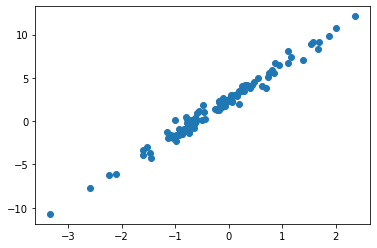

In [40]:
plt.plot(x,y,'o')

`-` 시도 : $(\hat{w}_0, \hat{w}_1)= (-5,10)$을 선택하여 선을 그려보고 적당한지 판단

`-` $\hat{y}_1= -5+10 x_i$ 와 같이 $y_i$의 값을 적합시키겠다는 의미

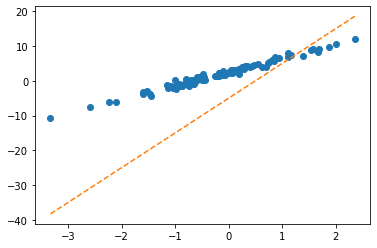

In [47]:
plt.plot(x,y,'o')
plt.plot(x,-5+10*x,'--')

`-` 벡터 표현으로 주황색 선을 계산

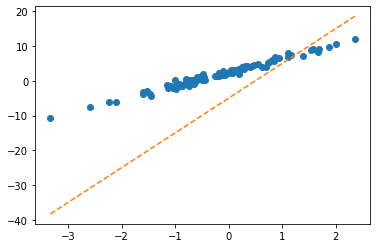

In [48]:
what= torch.tensor([-5.0,10.0])
plt.plot(x,y,'o')
plt.plot(x,X@what,'--')

### 파라미터 학습하는 방법(적당한 선으로 업데이트하는 방법)

`-` **컴퓨터의 반복계산을 통해 추론 (경사하강법)**

### (1) initial value: 임의의 선을 일단 그어본다.


In [53]:
What= torch.tensor([-5.0,10.0],requires_grad=True)

In [54]:
What

tensor([-5., 10.], requires_grad=True)

- 처음에는 ${\bf \hat{W}}=\begin{bmatrix} \hat{W}_0 \\ \hat{W}_1 \end{bmatrix}= \begin{bmatrix} -5 \\ 10 \end{bmatrix}$ 를 대입해서 주황색 점선을 적당히 그려보자는 의미

- 끝에 requires_grad=True는 나중에 미분을 위한 것

In [55]:
yhat = X@What

In [63]:
yhat

tensor([-38.3115, -30.8321, -27.4556, -26.0208, -21.0948, -21.0910, -20.2560,
        -19.7823, -19.4646, -16.6076, -16.3342, -15.7028, -15.3734, -15.2333,
        -15.0553, -14.9624, -14.8228, -14.7977, -14.2758, -14.2739, -13.7426,
        -13.6959, -13.3126, -13.1385, -12.9807, -12.7731, -12.7345, -12.5023,
        -12.4787, -12.1214, -12.0396, -11.9697, -11.6291, -11.5398, -11.5397,
        -11.4464, -11.2985, -11.2002, -11.1774, -11.0919, -10.9619, -10.6008,
        -10.0649,  -9.7568,  -9.6102,  -9.3704,  -7.5146,  -7.2227,  -7.1061,
         -6.8600,  -6.8527,  -6.7594,  -6.5785,  -6.3162,  -6.1102,  -6.0103,
         -6.0017,  -5.7213,  -5.2879,  -5.2550,  -5.0755,  -4.8966,  -4.5430,
         -4.3884,  -4.3372,  -4.0022,  -3.6259,  -3.4704,  -3.4223,  -3.0618,
         -3.0094,  -3.0092,  -2.7157,  -2.5560,  -2.0726,  -1.9628,  -1.5665,
         -1.0442,  -0.5849,  -0.3236,   0.4514,   1.1554,   1.9954,   2.3169,
          2.6260,   3.0731,   3.5394,   3.6569,   4.3864,   6.01

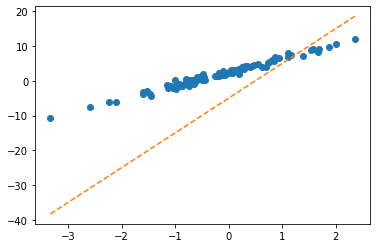

In [62]:
plt.plot(x,y,'o')
plt.plot(x,yhat.data,'--')

### (2) 첫번째 수정: 적당한 선의 적당한 정도를 판단하고 더 적당한 선으로 업데이트

`-` 적당한 정도를 알기 위해 loss function 도입!! 

`-` $loss= \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \sum_{i=1}^{n}(y_i - (\hat{w}_0+\hat{w}_1x_i))^2$
  
  $ = ({\bf y}-{\bf \hat{y}})^\top({\bf y}-{\bf \hat{y}}) = ({\bf y}-{\bf X\hat{W}})^\top({\bf y}-{\bf X\hat{W}})$ 

`-` loss 함수의 특징

`-` $y_i \approx \hat{y}_i$ 일수록 loss 값이 작다

`-` $y_i \approx \hat{y}_i$ 이 되도록 $(\hat{w}_0, \hat{w}_1)$을 잘 찍으면 loss값이 작다.

`-` (중요) 주황색 점선이 '적당' 할수록 loss값이 작다

In [65]:
#What= torch.tensor([-5.0,10.0],requires_grad=True)
#What
loss= (y-yhat)@(y-yhat) #내적
loss

tensor(11094.6221, grad_fn=<DotBackward>)

In [68]:
loss= torch.sum((y-yhat)**2) #제곱해서 합
loss

tensor(11094.6221, grad_fn=<SumBackward0>)